# Part I: plotting heatmap confusion matrices

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import random



from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

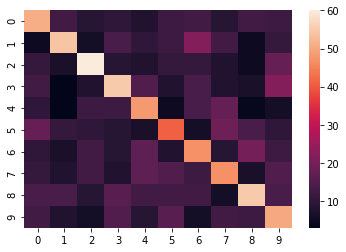

In [2]:
from rich import print as pp

model_scales = {"small":10,
                "medium": 50,
                "large": 100,
                "x-large": 200}

num_classes = model_scales['small']
# num_classes = model_scales['medium']
# num_classes = model_scales['large']
# num_classes = model_scales['x-large']

x, y = make_classification(n_samples=5000, n_classes=num_classes, n_features=num_classes*3, n_clusters_per_class=1, n_informative=num_classes*3-2)#, n_informative=4)

# wine = datasets.load_wine()
# x = wine.data
# y = wine.target
# class_names = wine.target_names

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

classifier_tree = DecisionTreeClassifier()

y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)

cm = confusion_matrix(y_test, y_predict)

cm_df = pd.DataFrame(cm)

sns.heatmap(cm_df)
clf_report = classification_report(y_test, y_predict, output_dict=True)
pp(clf_report)

In [5]:
precision

[('0', 0.3269230769230769),
 ('1', 0.421875),
 ('2', 0.410958904109589),
 ('3', 0.3503184713375796),
 ('4', 0.3157894736842105),
 ('5', 0.2907801418439716),
 ('6', 0.2974683544303797),
 ('7', 0.31333333333333335),
 ('8', 0.3873239436619718),
 ('9', 0.29411764705882354)]

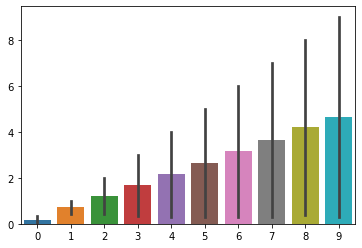

In [7]:
import seaborn as sns


sns.barplot(data=precision)

In [9]:
fig = wandb.plot.bar(table, "label", "value", title="per-class-precision")


dir(fig)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'fields',
 'string_fields',
 'table',
 'viz_id']

In [11]:
fig.fields

{'label': 'label', 'value': 'value'}

In [13]:
from lightning_hydra_classifiers.callbacks.class_label_stats_callbacks import plot_class_counts
import matplotlib.pyplot as plt
from lightning_hydra_classifiers.scripts.multitask.train import load_data
from lightning_hydra_classifiers.utils.etl_utils import ETL
from omegaconf import OmegaConf


overrides = []    
task_id = 1
config = ETL.load_hydra_config(config_name = "finetune_config",
                               config_path = "/media/data/jacob/GitHub/lightning-hydra-classifiers/configs",
                               overrides=overrides)
OmegaConf.set_struct(config, False)


datamodule = load_data(config,
                       task_id=task_id)

/media/data/conda/jrose3/envs/sequoia/lib/python3.8/site-packages/hydra/experimental/initialize.py:98: UserWarning: hydra.experimental.initialize_config_dir() is no longer experimental. Use hydra.initialize_config_dir().
  deprecation_warning(
/media/data/conda/jrose3/envs/sequoia/lib/python3.8/site-packages/hydra/experimental/compose.py:18: UserWarning: hydra.experimental.compose() is no longer experimental. Use hydra.compose()
  deprecation_warning(


task_0[train].eager_encode_targets = False
task_0[val].eager_encode_targets = False


2021-10-28 00:17:31,415 lightning_hydra_classifiers.experiments.multitask.datamodules INFO     set_task(task_id=1)
2021-10-28 00:17:31,417 lightning_hydra_classifiers.experiments.multitask.datamodules INFO     Task_1 (None): datamodule.setup(stage=fit)
2021-10-28 00:17:31,417 lightning_hydra_classifiers.experiments.multitask.datamodules INFO     Task_1: datamodule.setup(stage=test)


task_0[test].eager_encode_targets = False


In [16]:
# df = df.value_counts(y_col)
subset="train"
y_col="family"
df = getattr(datamodule, f"{subset}_dataset").samples_df.value_counts(y_col)


In [18]:
df.to_dict()

{'Myrtaceae': 293,
 'Phyllanthaceae': 269,
 'Fabaceae': 253,
 'Lauraceae': 230,
 'Annonaceae': 161,
 'Salicaceae': 160,
 'Melastomataceae': 130,
 'Combretaceae': 118,
 'Passifloraceae': 98,
 'Malvaceae': 58,
 'Sapindaceae': 48,
 'Apocynaceae': 41,
 'Rosaceae': 40,
 'Rubiaceae': 32,
 'Anacardiaceae': 23,
 'Fagaceae': 22,
 'Betulaceae': 15,
 'Ericaceae': 10,
 'Celastraceae': 10}

In [23]:
label_col ="family"
df.value_counts(label_col)

family
Fabaceae           460
Rubiaceae          409
Salicaceae         255
Sapindaceae        194
Apocynaceae        193
Ericaceae          171
Rosaceae           157
Fagaceae           156
Annonaceae         149
Betulaceae         119
Malvaceae          119
Celastraceae       117
Anacardiaceae       94
Myrtaceae           68
Combretaceae        44
Melastomataceae     31
Phyllanthaceae      29
Lauraceae           21
Passifloraceae      11
dtype: int64

In [25]:
df.groupby(label_col).agg(len)

,path,family,species,collection,catalog_number
genus,,,,,
Abatia,2,2,2,2,2
Abrus,2,2,2,2,2
Abutilon,1,1,1,1,1
Acacia,4,4,4,4,4
Acer,63,63,63,63,63
...,...,...,...,...,...
Xylosma,11,11,11,11,11
Zanha,1,1,1,1,1
Zenobia,1,1,1,1,1


In [24]:
label_col ="genus"
df.value_counts(label_col)

genus
Salix            157
Quercus          130
Acer              63
Psychotria        45
Populus           45
                ... 
Meiocarpidium      1
Mazaea             1
Maurocenia         1
Coptosapelta       1
Pachycarpus        1
Length: 956, dtype: int64

In [27]:
df = getattr(datamodule, f"{subset}_dataset").samples_df

In [30]:
a = df.head(5).to_dict()

a.keys()

a["path"].keys()

dict_keys([0, 1, 2, 3, 4])

In [33]:
a = df.head(5).to_records()

a[0]

(0, '/media/data_cifs/projects/prj_fossils/data/processed_data/data_splits/PNAS_family_100_512/train/Fagaceae/Fagaceae_Lithocarpus_densiflora_Axelrod_105.jpg', 'Fagaceae', 'Lithocarpus', 'densiflora', 'Axelrod', 'Axelrod_105')

In [35]:
wandb.init()

data = df.to_records()
table = wandb.Table(data=data, columns=["idx", *df.columns])
wandb.log({'my_histogram': wandb.plot.histogram(table, "family", title=None)})

wandb.finish()

In [38]:
from typing import *


def make_class_counts_table(df: pd.DataFrame, label_col: str="family") -> wandb.Table:
    """
    Convert a dataframe with long-form dataset labels into a class counts dataframe, then return as a wandb.Table
    
    Select column label_col for aggregation via count
    """

    df = df.value_counts(label_col)        
    data = [(label, count) for label, count in df.to_dict().items()]
    table = wandb.Table(data=data, columns=["label", "value"])
    return table



def make_wandb_table(df: pd.DataFrame, include_cols: Union[bool, List[str]]) -> wandb.Table:
    """
    Create an arbitrary dataset metadata table in the form of a queryable wandb.Table
    
    Select columns from a dataframe and add all rows to a wandb.Table with only these columns
    """
    if include_cols is True:
        cols = df.columns
    elif isinstance(include_cols, list):
        cols = include_cols
    else:
        raise Exception(f"Invalid value for include_cols={include_cols}. Must be either True or a list of strings.")
        
    data = df[cols].to_records()
    table = wandb.Table(data=data, columns=["idx", *cols])
    return table

In [ ]:
wandb.Artifact

In [ ]:
wandb.Artifact

In [44]:
# Run 1: Create a dataset

class WandbDatasetArtifactManager:
    
    def __init__(self,
                 run,
                 ):
        self.run = run
        
        
    def create_dataset_artifact(self,
                                data_df: pd.DataFrame,
                                include_cols: Union[bool, List[str]]=True,
                                table_name: str="training_data",
                                artifact_kwargs: Dict[str,Any]={"name":"dataset",
                                                                "type":"dataset"}
                               ):

        
        art = wandb.Artifact(**artifact_kwargs)
        table = make_wandb_table(df=data_df, include_cols=include_cols)
        art.add(table, name=table_name)
        self.run.log_artifact(art)
        
        
    def use_artifact(artifact_or_name="dataset:latest",
                     table_name="training_data"):
        
        return run.use_artifact(artifact_or_name).get(table_name)

    

    
#         preds = wandb.Table(...) # load this up with predictions using "training" data
#         art = wandb.Artifact("prediction", "results")
        
#         art = wandb.Artifact(**artifact_kwargs)
#         table = make_wandb_table(df=data_df, include_cols=include_cols)
#         art.add(table, name=table_name)
#         self.run.log_artifact(art)

    def log_predictions_artifact(self,
                                 preds_df: pd.DataFrame,
                                 include_cols: Union[bool, List[str]]=True,
                                 table_name: str="predictions_data",
                                 preds_key: str="catalog_number",
                                 ref_key: str="catalog_number",
                                 artifact_kwargs: Dict[str,Any]={"name":"predictions",
                                                                 "type":"results"},
                                 ref_artifact_kwargs: Dict[str,Any]={"artifact_or_name":"dataset",
                                                                           "version":"latest",
                                                                           "table_name":"data_catalog"}):

        art = wandb.Artifact(**artifact_kwargs)
        preds_table = make_wandb_table(df=preds_df, include_cols=include_cols)
        art.add(table, name=table_name)
        
        artifact_or_name = ref_artifact_kwargs["artifact_or_name"]
        version = ref_artifact_kwargs["version"]
        if isinstance(artifact_or_name, str):
            artifact_or_name = ":".join([artifact_or_name , version])
            
        ref_table_name = ref_artifact_kwargs["table_name"]
        reference_table = self.use_artifact(artifact_or_name, table_name=ref_table_name)

        # art = wandb.Artifact("prediction", "results")
        # Assuming training has a column called `t_id` and `preds` has a column named `p_id` (just making them different for illustrative purposes)
        preds_table.set_fk(preds_key, reference_table, ref_key)
        art.add(preds, ref_table_name)
        run.log_artifact(art)



        

        
    def get_artifact(self,
                                data_df: pd.DataFrame,
                                include_cols: Union[bool, List[str]]=True,
                                table_name: str="training_data",
                                artifact_kwargs: Dict[str,Any]={"name":"dataset",
                                                                "type":"dataset"}
                               ):

        
# Run 2: Create model predictions based on the data and create a linked table
# run = wandb.init(...)

#     def log_predictions_artifact():

#     training = run.use_artifact("dataset:latest").get("training_data")
#     preds = wandb.Table(...) # load this up with predictions using "training" data
#     art = wandb.Artifact("prediction", "results")
#     # Assuming training has a column called `t_id` and `preds` has a column named `p_id` (just making them different for illustrative purposes)
#     preds.set_fk("p_id", training, "t_id") # makes and explicit link between the tables
#     art.add(preds, "pred_data")
#     run.log_artifact(art)


SyntaxError: EOL while scanning string literal (4289874263.py, line 12)

In [39]:
table = make_wandb_table(df=df, include_cols=True)
table

In [43]:
# data_table = table.to_data_array()

len(table.data)

2797

In [21]:
import pandas as pd

wandb.init()
for subset in ["train", "val", "test"]:

    df = getattr(datamodule, f"{subset}_dataset").samples_df
    table = make_class_counts_table(df=df, label_col="family")
    
    wandb.log({f"class_counts/{subset}": wandb.plot.bar(table, "label", "value", title=f"class counts ({subset})")})
    print(subset)
wandb.finish()

train
val
test


In [ ]:
# clf_report = {k:v for k,v in clf_report.items() if k not in ("accuracy", "macro avg", "weighted avg")}
# pp(clf_report)
# precision = pd.DataFrame([(k, v["precision"]) for k,v in clf_report.items()])
# with wandb.init() as run:

#     table = wandb.Table(data=precision, columns = ["label", "value"])
#     wandb.log({"clf_report/per-class-precision": wandb.plot.bar(table, "label", "value", title="per-class-precision")})

In [12]:
import wandb

clf_report = {k:v for k,v in clf_report.items() if k not in ("accuracy", "macro avg", "weighted avg")}
pp(clf_report)

precision = pd.DataFrame([(k, v["precision"]) for k,v in clf_report.items()])


with wandb.init() as run:

    table = wandb.Table(data=precision, columns = ["label", "value"])
    wandb.log({"clf_report/per-class-precision": wandb.plot.bar(table, "label", "value", title="per-class-precision")})


In [4]:
wandb.__version__

'0.12.6'

In [8]:
!pip install --upgrade wandb

     |████████████████████████████████| 1.7 MB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 139 kB 37.0 MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=1a47ae728f690bddb2200877816fbb7d7e7e22b188dbf817320fd54fbef1ceca
  Stored in directory: /home/jrose3/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: sentry-sdk
    Found existing installation: sentry-sdk 0.20.2
    Uninstalling sentry-sdk-0.20.2:
      Successfully uninstalled sentry-sdk-0.20.2
  Attempting uninstall: wandb
    Found existing installation: wandb 0.10.26
    Uninstalling wandb-0.10.26:
      Successfully uninstalled wandb-0.10.26
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sequoia 0.0.1.post154.dev0+g082e3b0 requires pyyaml!=5.4.*,>=5.1,

In [ ]:
# import plotly.express as px
import numpy as np
df = px.data.iris()
df

In [ ]:
labels_df = pd.read_csv("/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v1_0/Extant_Leaves_family_3_512/Extant_Leaves_family_3_512-full_dataset.csv")
labels = sorted(list(set(labels_df.family)))
labels[:5]

In [ ]:
import plotly.express as px
import plotly.figure_factory as ff
from typing import *
# num_classes = 14    
    
def plot_confusion_matrix(cm: pd.DataFrame,
                          labels: List[str]=None,
                          robust: bool=False,
                          title: str="Confusion matrix of val predictions for model",
                          save_path: Optional[str]=None,
                          backend="seaborn"):
    """
    Helper function with good defaults for quickly plotting confusion matrices, whether num_classes=10 or 200.
    
    """
    num_classes = cm.shape[0]
    
    linewidths = 0.01
    if num_classes < 15:
        figsize = (9,8)
    elif num_classes < 60:
        figsize = (18,16)
    elif num_classes < 150:
        figsize = (18,16)
        linewidths = 0.0
    elif num_classes >= 150:
        figsize = (27, 24)
        linewidths = 0.0

    annot = True if num_classes<=35 else False

    if backend=="plotly":
        import plotly.figure_factory as ff
        
        size = 20*num_classes
        fig = ff.create_annotated_heatmap(z=cm,
                                          x=labels,
                                          y=labels,
                                          annotation_text=None)
        fig.update_layout(height=size,
                          width=size+40)
#         fig = px.imshow(cm,
#                         labels=dict(x="Predicted Labels", y="True Labels", color="Count"),
#                         title=title)
        ax = plt.gca()
        if isinstance(save_path, str):
            fig.write_html(f"{save_path}.html")
            
    elif backend=="seaborn":
        fig, ax = plt.subplots(1,1, figsize=figsize)

        sns.heatmap(cm,
                    linewidths=linewidths,
                    robust=robust,
                    square=True,
                    annot=annot,
                    cbar_kws={"shrink": .9})
        plt.title(title)
        if isinstance(save_path, str):
            plt.savefig(f"{save_path}.png")
    
    return fig, ax


num_classes = 100
print(f"plotting {num_classes} out of {len(labels)} total classes")
fig, ax = plot_confusion_matrix(cm=cm_df.iloc[:num_classes,:num_classes].values,
                                labels=labels[:num_classes],
                                robust=False,
                                title="Confusion matrix of val predictions for model",
                                backend="plotly") #"seaborn")

fig.show()

In [ ]:
fig.write_html("test_conf_matrix.html")

In [ ]:
import wandb


with wandb.init() as run:
    
    wandb.log({"chart":fig})

In [ ]:


import plotly.express as px

fig = px.imshow([[1, 20, 30],
                 [20, 1, 60],
                 [30, 60, 1]])
fig.show()

In [ ]:
!pip list | grep jupyterlab

In [ ]:
!pip list | grep plotly

# Part II: PyTorch layer monitoring with hooks

Source: https://towardsdatascience.com/the-one-pytorch-trick-which-you-should-know-2d5e9c1da2ca

In [ ]:
import torch
from PIL import Image
from torchvision import transforms as T
from torchvision.models import resnet34

import matplotlib.pyplot as plt
import os
from pathlib import Path
from typing import *

import numpy as np

from tqdm.auto import trange, tqdm


import collections
from torch import nn
from torchinfo import summary


def tensor2np(tensor: torch.Tensor) -> np.ndarray:
    return tensor.detach().to('cpu').numpy()    


class SaveOutput:
    """
    Simple container class to be used by ModelHookImageRecorder
    Maintains a list of model outputs produced during inference after an instance of this class has been registered as a forward hook.
    """
    def __init__(self):
        self.outputs = []
        
    def __call__(self, module, module_in, module_out):
        self.outputs.append(module_out)
        
    def clear(self):
        self.outputs = []
        
        
class ModelHookImageRecorder:
    
    """
    Available methods:
    
    __init__
    adjust_plot_kwargs
    clear
    get_device
    
    register_model
    register_image
    display_layers
    display_layer
    
    TBD:
        - Create a clean looking repr for the class
        - Allow configurable saving workflows optimized for specific analysis needs (e.g. format outpaths into subdirectories for each input image vs. each layer)
        - Improve the channel visualization -- adapt # of axes to # of channels.
        
    configs (TBD):
        - 
            i. compare models & images side-by-side:
                - root/layer_{0}/{img_names[0]}__{model_names.A}.jpg
                - root/layer_{0}/{img_names[0]}__{model_names.B}.jpg
                - root/layer_{0}/{img_names[1]}__{model_names.A}.jpg
                - root/layer_{0}/{img_names[1]}__{model_names.B}.jpg
                - root/...
                - root/layer_{0}/{img_names[m]}__{model_names.A}.jpg
                - root/layer_{0}/{img_names[m]}__{model_names.B}.jpg
                - root/...
                - root/layer_{n}/{img_names[m]}__{model_names.A}.jpg
                - root/layer_{n}/{img_names[m]}__{model_names.B}.jpg

                
            i. compare models & layers side-by-side:
                - root/{img_names[0]}/layer_{0}__{model_names.A}.jpg
                - root/{img_names[0]}/layer_{0}__{model_names.B}.jpg
                - root/...
                - root/{img_names[0]}/layer_{n}__{model_names.A}.jpg
                - root/{img_names[0]}/layer_{n}__{model_names.B}.jpg
                - root/...
                - root/{img_names[m]}/layer_{0}__{model_names.A}.jpg
                - root/{img_names[m]}/layer_{0}__{model_names.B}.jpg
                - root/...
                - root/{img_names[m]}/layer_{n}__{model_names.A}.jpg
                - root/{img_names[m]}/layer_{n}__{model_names.B}.jpg
                



    """
    
    def __init__(self, 
                 model: torch.nn.Module,
                 save_dir: Optional[Union[Path, str]]=None,
                 save_conv_outputs: bool=True,
                 save_model_summary: bool=True,
                 model_name: str="",
                 img_path: Optional[str]=None,
                 img_tensor: Optional[torch.Tensor]=None,
                 img_size: Tuple[int]=(224,224)):
        self._saver = SaveOutput()
        self.clear()
        self.adjust_plot_kwargs()
        self.save_dir = save_dir
        self.img_size = img_size
        self.register_model(model, model_name, save_conv_outputs, save_model_summary)
        self.register_image(img_path, img_tensor, img_size)

    def clear(self):
        self._saver.clear()
        self.hook_handles = []
        self.layer_names = []
        self.output_paths = []
        for attr in ["img", "img_path", "img_tensor", "img_size", "output_tensor"]:
            if hasattr(self, attr):
                setattr(self, attr, None)

    def get_device(self):
        if hasattr(self.model, "device"):
            return self.model.device
        return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
        
        
    def register_model(self, 
                       model: torch.nn.Module,
                       model_name: str="",
                       save_conv_outputs: bool=True,
                       save_model_summary: bool=True):
        self.model = model
        self.device = self.get_device()
        self.model_name = model_name
        self.save_conv_outputs = save_conv_outputs
        self.save_model_summary = save_model_summary

        if save_model_summary:
            self.model_summary = log_model_summary(model=model,
                                                   input_size=(1,3,*self.img_size),
                                                   full_summary=True,
                                                   working_dir=self.save_dir,
                                                   model_name=model_name)
        
        modules = list(self.model.named_modules())
        for i, (name, layer) in enumerate(modules):
            if self.save_conv_outputs and isinstance(layer, torch.nn.modules.conv.Conv2d):
                handle = layer.register_forward_hook(self._saver)
                self.hook_handles.append(handle)
                self.layer_names.append(name)
                print(f"Layer {name} ({i}/{len(modules)}): Registered forward_hook")
        
        
    def register_image(self,
                       path: Optional[str]=None,
                       img_tensor: Optional[torch.Tensor]=None,
                       img_size: Tuple[int]=(224,224)):
        self.img_size = img_size
        self.input_transform = T.Compose([T.Resize(self.img_size), T.ToTensor()])
        
        if os.path.isfile(str(path)):
            self.img_path = path
            self.img = Image.open(path)
            self.img_tensor = self.input_transform(self.img).to(self.model.device)
        elif img_tensor is not None:
            self.img_path = None
            self.img = None
            self.img_tensor = img_tensor            
        else:
            raise ArgumentError("Must pass either a path to an on-disk image file or a ready-to-use image tensor.")
            
        if self.img_tensor.ndimension() == 3:
            self.img_tensor = self.img_tensor.unsqueeze(dim=0)
        if self.img_tensor.ndimension() == 4:
            self.num_imgs = self.img_tensor.shape[0]
        self.output_tensor = self.model(self.img_tensor)


    def adjust_plot_kwargs(self, reset_to_defaults: Optional[bool]=False, **kwargs):
        if reset_to_defaults or (not hasattr(self, "plot_kwargs")):
            self.plot_kwargs = {"figsize": (20, 20),
                                "gridsize": (4, 4),
                                "rect": (0.0, 0.0, 1.0, 0.97)}
#                                 "rect": (0.0, 0.0, 1.0, 0.97)}
        self.plot_kwargs.update(kwargs)
 

    def display_layer(self,
                      layer_index: int=0,
                      save_dir: Optional[Union[Path, str]]=None,
                      figtitle: Union[bool, str]=False,
                      verbose: bool=True):
        """
        Display the output arrays from layers[layer_index] arranged in a 4x4 grid & optionally save them to disk.
        """
        
        model_name = self.model_name
        img_name = "default"
        if isinstance(self.img_path, (Path, str)):
            img_name = Path(self.img_path).stem

        output_imgs = tensor2np(self._saver.outputs[layer_index])

        if verbose: print(f"Displaying first 16 channels from the output of layer #{layer_index}")
            
        #TODO move the ugly code here into a separate plot image grid function
        with plt.style.context("seaborn-white"):
            for img_idx in trange(self.num_imgs, desc="input imgs:", position=1):
                plt.figure(figsize=self.plot_kwargs["figsize"], frameon=False, constrained_layout=True)
                max_channels_to_plot = np.prod(self.plot_kwargs['gridsize'])
                for idx in trange(max_channels_to_plot, desc=f"Channels:", position=2):
                    plt.subplot(*self.plot_kwargs["gridsize"], idx+1)
                    plt.imshow(output_imgs[0, idx])
                plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

    #             plt.tight_layout(self.plot_kwargs["rect"])
                if figtitle is True:
                    figtitle = f"Image: {img_name}|Model: {model_name}|conv layer: {layer_index}, shape(B,C,H,W)={output_imgs.shape}|first {max_channels_to_plot} channels"
                if isinstance(figtitle, str): plt.suptitle(figtitle, fontsize="x-large") #medium")

                if (save_dir is None) and (self.save_dir is not None):
                    save_dir = self.save_dir    
                if isinstance(save_dir, (Path, str)):
    #                 outpath = os.path.join(save_dir, model_name, f"layer_{layer_index}", img_name + ".jpg")
                    outpath = os.path.join(save_dir, f"layer_{layer_index}", img_name + ".jpg")
                    os.makedirs(Path(outpath).parent, exist_ok=True)
                    plt.savefig(outpath)
                    if verbose:
                        print(f"Exported conv layer outputs to image file: {outpath}")
                    self.output_paths.append(outpath)

                
    def display_layers(self,
                      layer_range: Optional[Union[int, Sequence]]=None,
                      save_dir: Optional[Union[Path, str]]=None,
                      figtitle: Union[bool, str]=False,
                      verbose: bool=True):
        """
        Call recorder.display_layer on the set of model layers indicated in layer_range.
        """
        layer_range = self.get_indices(index=layer_range)
        
        for idx in tqdm(layer_range, desc=f"Layers:", total=len(layer_range), position=0):
            self.display_layer(layer_index=idx,
                               save_dir=save_dir,
                               figtitle=figtitle,
                               verbose=verbose)
            
        return self.output_paths
    
    def _get_index(self, index: int=None) -> int:
        max_layers = len(self.hook_handles)
        if index is None:
            index = max_layers
        if isinstance(index, int):
            if index < 0:
                index = max_layers + index
        return index
        
    def get_indices(self, index: Union[int, Sequence]) -> List:
        if (index is None) or isinstance(index, int):
            return list(range(self._get_index(index)))
        if isinstance(index, Sequence):
            index = list(index)
            for i in range(len(index)):
                index[i] = self._get_index(index[i])
        else:
            raise ArgumentError("index must be either an int, Sequence-like type, or None.")
        return index

    
    


# __all__ = ["log_model_summary"]


def log_model_summary(model: nn.Module,
                      input_size: Tuple[int],
                      full_summary: bool=True,
                      working_dir: str=".",
                      model_name: Optional[str]=None,
                      verbose: bool=1):
    """
    produce a text file with the model summary
    
    TODO: Add this to Eval Plugins
    
    log_model_summary(model=model,
                  working_dir=working_dir,
                  input_size=(1, data_config.channels, *data_config.image_size),
                  full_summary=True)

    """

    if full_summary:
        col_names=("kernel_size", "input_size","output_size", "num_params", "mult_adds")
    else:
        col_names=("input_size","output_size", "num_params")

    model_summary = summary(model.cuda(),
                            input_size=input_size,
                            row_settings=('depth', 'var_names'),
                            col_names=col_names,
                            verbose=verbose)

    if (model_name in ("", None)) and (hasattr(model, "name")):
        model_name = model.name
    if (model_name in ("", None)):
        summary_path = os.path.join(working_dir, f'model_summary.txt')
    else:
        summary_path = os.path.join(working_dir, f'{model_name}_model_summary.txt')
    
    os.makedirs(os.path.dirname(summary_path), exist_ok=True)

    with open(summary_path, "w") as f:
        f.write(str(model_summary))
        
    return model_summary

## Merging from code moved to script

In [ ]:
from lightning_hydra_classifiers.models.utils.visualize_model_layers import *

from lightning_hydra_classifiers.scripts.multitask.train import load_data 
# MultiTaskDataModule, LitMultiTaskModule, ImagePredictionLogger, train_task,  CIFAR10DataModule, run_multitask_test, load_data_and_model #, resolve_config, configure_callbacks, configure_loggers, configure_trainer
# from lightning_hydra_classifiers.data.datasets.common import toPIL
from lightning_hydra_classifiers.utils.etl_utils import ETL
from omegaconf import OmegaConf
from rich import print as pp

In [ ]:

parser = build_parser()
args = parser.parse_args("")
args.img_size = (args.resolution, args.resolution)
pp(args)



overrides = ['model/backbone=resnet50',"data=extant_to_pnas", f"data.image_size={args.resolution}", "trainer.max_epochs=2", "data.batch_size=32", "trainer.precision=16", "trainer.gpus=[7]"]
config = ETL.load_hydra_config(config_name = "config",
                              config_path = "/media/data/jacob/GitHub/lightning-hydra-classifiers/configs",
                              overrides=overrides)

task_id = 1
pp(config.data)
datamodule = load_data(config,
                       task_id=task_id)

In [ ]:

# datamodule.train_dataset.fetch_item(0)

# img_batch = next(iter(datamodule.train_dataloader()))[0]
#
# img_batch = None
# args.img_path = datamodule.train_dataset.fetch_item(20).metadata["path"]
# args.img_path

In [ ]:
from tqdm.auto import trange, tqdm

dataset = datamodule.train_dataset
num_imgs = 10
img_indices = np.random.randint(0, len(dataset), size=num_imgs)

device = torch.device('cuda') if (torch.cuda.is_available() and not args.cpu_only) else torch.device('cpu')

from torchvision import models
MODEL_FACTORY = getattr(models, args.model)
model = MODEL_FACTORY(pretrained=args.pretrained)
model = model.to(device)
model.device = device

if args.model not in args.save_dir:
    args.save_dir = os.path.join(args.save_dir, args.model)

img_batch = None
save_model_summary=True
for img_idx in tqdm(img_indices, desc="input imgs:", position=0):

    args.img_path = dataset.fetch_item(img_idx).metadata["path"]

    hook_recorder = LayerOutputsImageRecorder(model=model,
                                              save_dir=args.save_dir,
                                              save_conv_outputs=True,
                                              save_model_summary=save_model_summary,
                                              model_name=args.model,
                                              img_tensor=img_batch,
                                              img_path=args.img_path,
                                              img_size=args.img_size)
    save_model_summary=False
#     break

#     max_hooks = len(hook_recorder.hook_handles)
#     num_hooks = 4
#     layer_range=range(0, max_hooks, max_hooks//num_hooks)

    layer_range = [0,1,-2,-1]

    hook_recorder.display_layers(layer_range=layer_range,
                                 save_dir=args.save_dir,
                                 figtitle=True)
    hook_recorder.clear()

## Demo layer visualization

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = resnet34(pretrained=True)
model = model.to(device)
model.device = device


# img_path = "/media/data/jacob/GitHub/lightning-hydra-classifiers/tests/test_images/wide_aspect_ratio_leaf_image.jpg"
img_path = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0/images/Extant_Leaves/512/3/jpg/Fabaceae/Fabaceae_Erythrina_herbacea_Wolfe_Wolfe_30524a.jpg"
model_name = "resnet34"
save_dir = os.path.join(os.getcwd(), model_name)
img_size = (224,224)

print(f"Model: {model_name}| device={str(device)}| img={Path(img_path).stem}| img_size={img_size}")


hook_recorder = ModelHookImageRecorder(model=model,
                                       save_dir=save_dir,
                                       save_conv_outputs=True,
                                       save_model_summary=True,
                                       model_name=model_name,
                                       img_path=img_path,
                                       img_size=img_size)


# for idx in range(5):
#     hook_recorder.display_layer(idx, figtitle=True)



# hook_recorder.display_layers(layer_range=[-1,-2,-3,3,2,1],
#                              save_dir=save_dir,
#                              figtitle=True)

max_hooks = len(hook_recorder.hook_handles)
num_hooks = 6

hook_recorder.display_layers(layer_range=range(0, max_hooks, max_hooks//num_hooks),
                             save_dir=save_dir,
                             figtitle=True)

In [ ]:
# save_output = SaveOutput()

# hook_handles = []

# for layer in model.modules():
#     if isinstance(layer, torch.nn.modules.conv.Conv2d):
#         handle = layer.register_forward_hook(save_output)
#         hook_handles.append(handle)

# img_path = "/media/data/jacob/GitHub/lightning-hydra-classifiers/tests/test_images/wide_aspect_ratio_leaf_image.jpg"

# image = Image.open(img_path)
# transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
# X = transform(image).unsqueeze(dim=0).to(device)

# out = model(X)

In [ ]:
# import matplotlib.pyplot as plt
# import os
# from pathlib import Path
# def tensor2np(tensor: torch.Tensor) -> np.ndarray:
#     return tensor.detach().to('cpu').numpy()    


# def display_layer(layer_index: int=0,
#                   save_dir: Union[Path, str]=os.getcwd(), 
#                   figtitle: Union[bool, str]=False,
#                   verbose: bool=True):
#     model_name = self.model_name
#     img_name = "default"
#     if hasattr(self, "img_path"):
#         img_name = Path(img_path).stem

#     output_imgs = tensor2np(save_output.outputs[layer_index])

#     if verbose: print(f"Displaying first 16 channels from the output of layer #{layer_index}")
#     with plt.style.context("seaborn-white"):
#         plt.figure(figsize=(20, 20), frameon=False)
#         for idx in range(16):
#             plt.subplot(4, 4, idx+1)
#             plt.imshow(images[0, idx])
#         plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
#         if figtitle is True:
#             figtitle = f"Image: {img_name}|Model: {model_name}|conv layer: {layer_index}"
#         if isinstance(figtitle, str): plt.suptitle(figtitle)
#         outpath = os.path.join(save_dir, model_name, f"layer_{layer_index}", img_name + ".jpg")
#         os.makedirs(Path(outpath).parent, exist_ok=True)
#         plt.savefig(outpath)
#         if verbose:
#             print(f"Exported conv layer outputs to image file: {outpath}")

# End

In [ ]:
import os
os.listdir(Path(predictions_path).parent)

# Part I Ignore, predictions

In [ ]:
# from rich import print as pp

# import lux
# import pandas as pd
# lux.config.default_display = "pandas"

# from lightning_hydra_classifiers.utils.etl_utils import ETL
# from omegaconf import OmegaConf


# predictions_path = '/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/experiment_logs/Transfer_Experiments/feature_extractor-PNAS-19_classes-res_512-bsz_32-resnet50-pretrained_True-pool_avg/replicate_1/results/task_1/test_predictions.csv'

# data = pd.read_csv(predictions_path)
# data

# from lightning_hydra_classifiers.utils.report_utils.pandas_embed_images import df_embed_paths2imgs
# from pathlib import Path


# df_html = df_embed_paths2imgs(df=data,
#                               file_path=str(Path(predictions_path.strip(".csv"))),
#                               path_col="paths",
#                               display=True)